In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
df=pd.read_csv('titanic.csv')

In [74]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
df.isnull().sum()   #checking the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [78]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [79]:
np.mean(df['Age'])  

29.69911764705882

In [80]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))#since it is a continuous value we will be replacing the nan values with mean of the column

In [81]:
df['Cabin']=df['Cabin'].fillna('NA')   #since there are huge missing in this data we would fill it with NA 

In [82]:
from scipy import stats as st    #replacing nan value in embarked column by taking the mode since its a object data type
arr=df["Embarked"]
print(st.mode(arr))

ModeResult(mode=array(['S'], dtype=object), count=array([644]))


In [83]:
df['Embarked']=df['Embarked'].fillna('S')

In [84]:
df.isnull().sum()   #All the Nan values are replaced with certain data accordingly

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

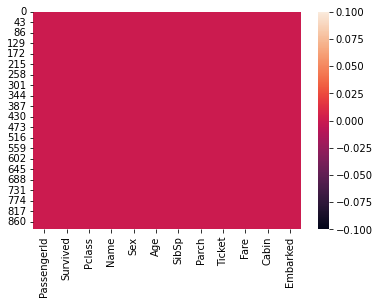

In [85]:
 sns.heatmap(df.isnull())   

Encoding

In [86]:
from sklearn.preprocessing import LabelEncoder   # we have converted the categorical data
le=LabelEncoder() 
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [87]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NA,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NA,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NA,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NA,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NA,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


In [88]:
df.nunique()   # to find the categorical features 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [89]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


In [90]:
df.corr()['Survived'].sort_values() #correlation of the columns with Target value 
                       #survival column is taken as output value
                       # passenger id and name column can be dropped as they are least correlated 

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

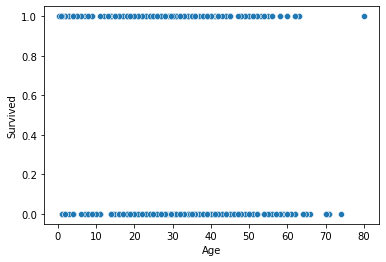

In [91]:
sns.scatterplot(x='Age',y='Survived',data=df)   #survival remains same from  12 to  65 years age

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

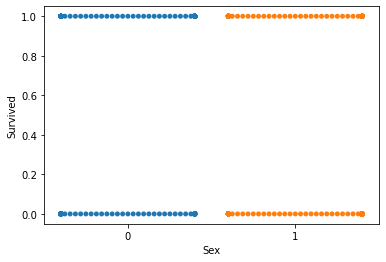

In [92]:
sns.swarmplot(x='Sex',y='Survived',data=df)   

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

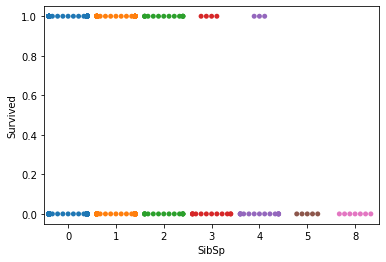

In [93]:
sns.swarmplot(x='SibSp',y='Survived',data=df) 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

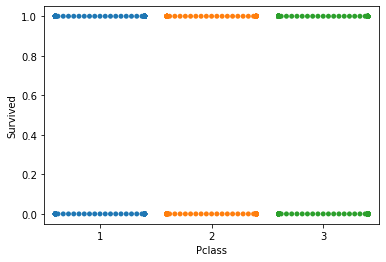

In [94]:
sns.swarmplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

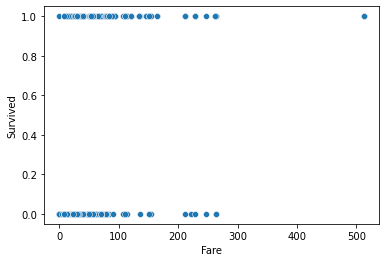

In [95]:
sns.scatterplot(x='Fare',y='Survived',data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

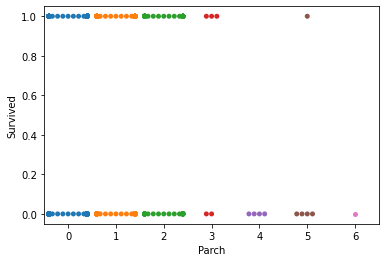

In [96]:
sns.swarmplot(x='Parch',y='Survived',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

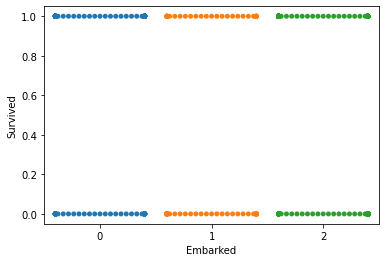

In [97]:
sns.swarmplot(x='Embarked',y='Survived',data=df)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


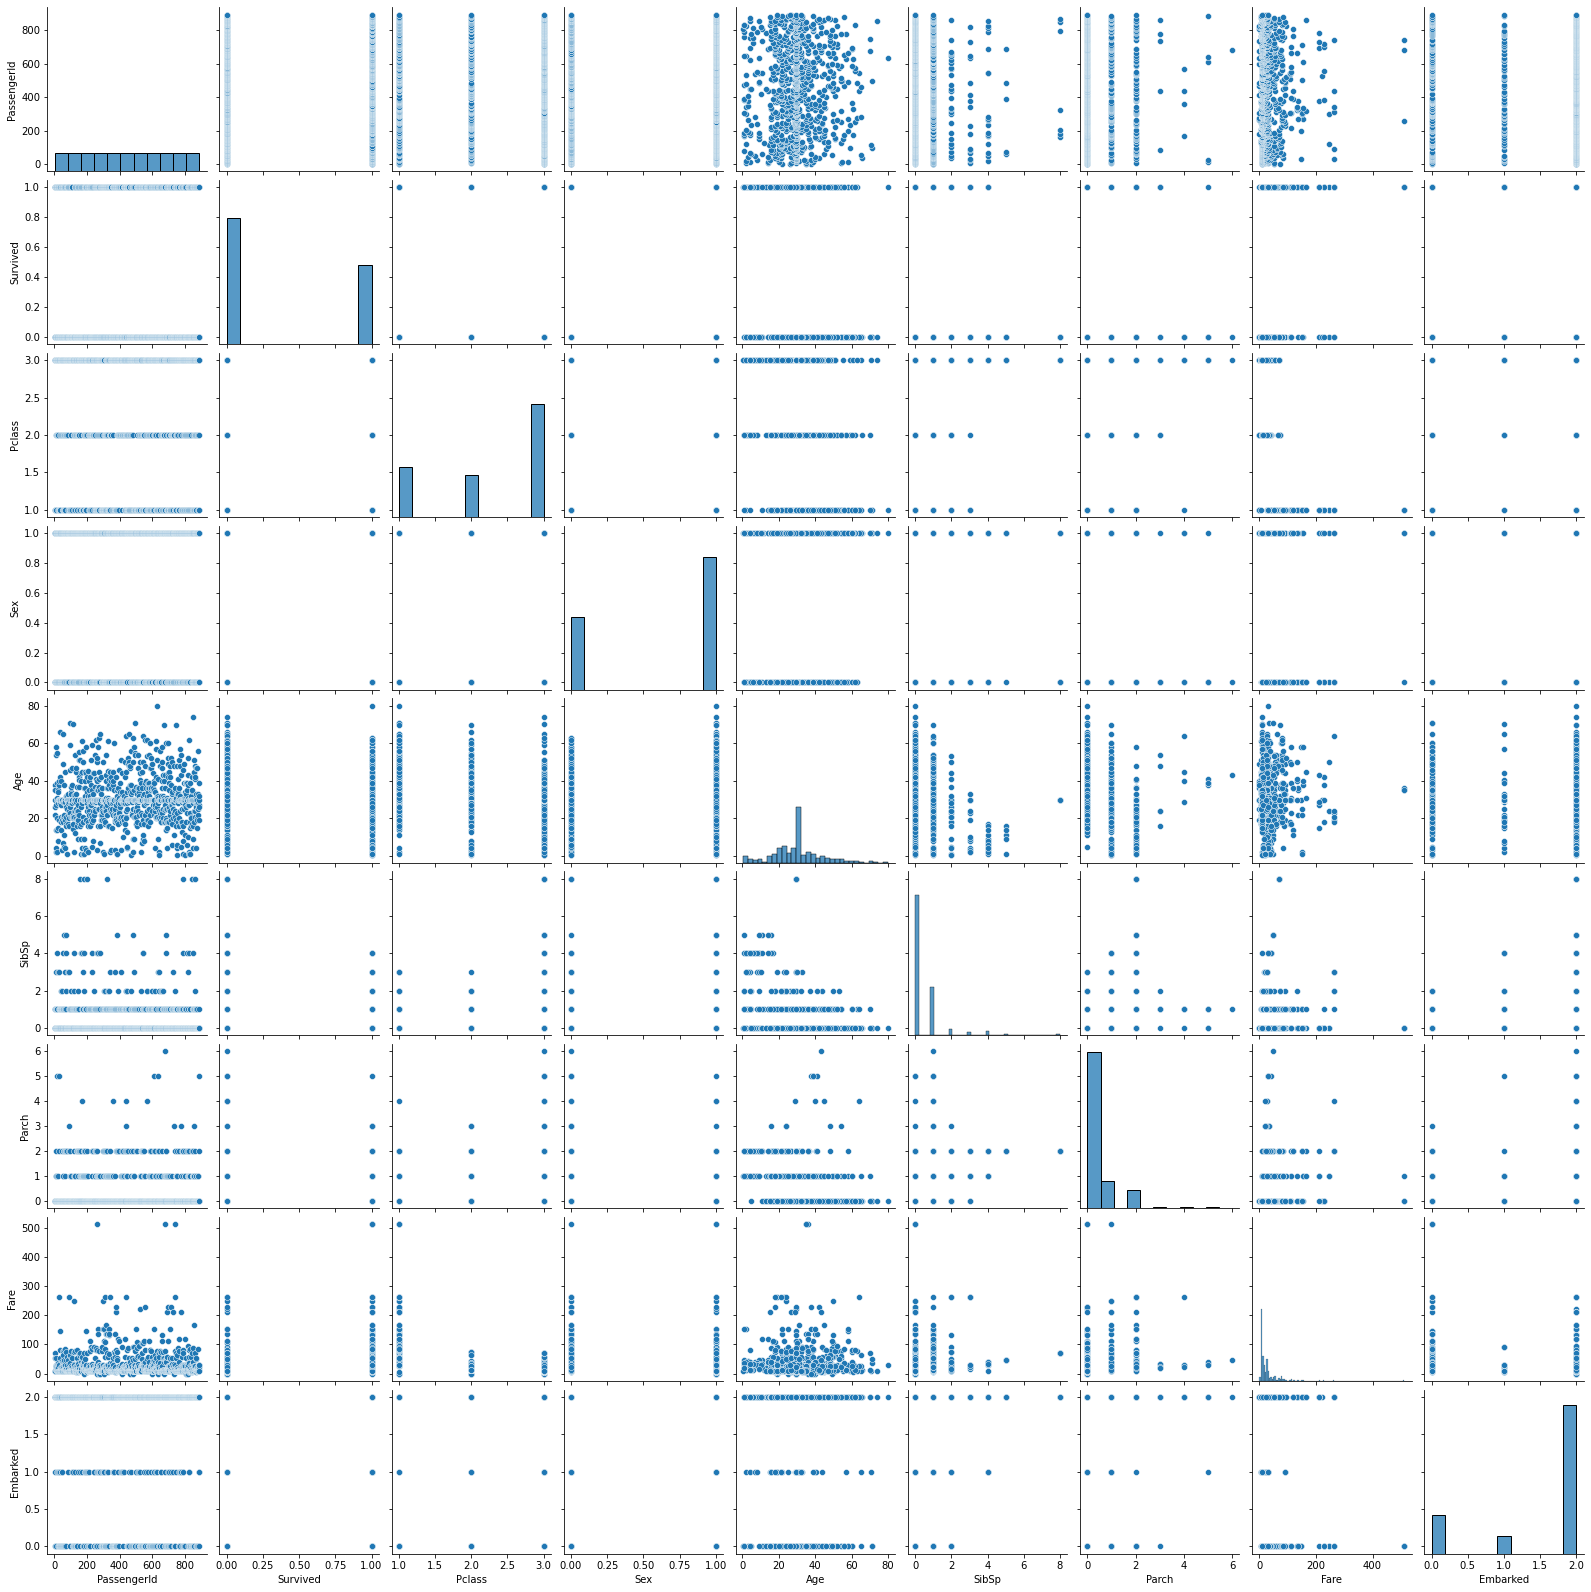

In [99]:
sns.pairplot(df)
plt.show()

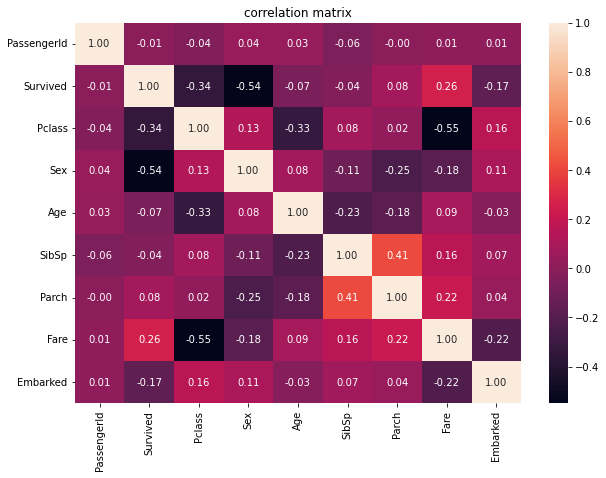

In [100]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black')
plt.title('correlation matrix')
plt.show()

In [101]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [102]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

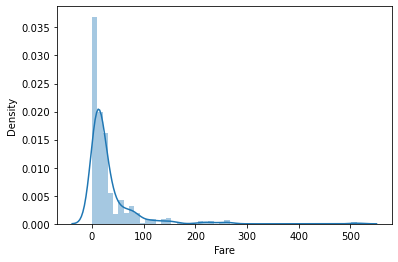

In [103]:
sns.distplot(df['Fare'])   # to check skewness of the data


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

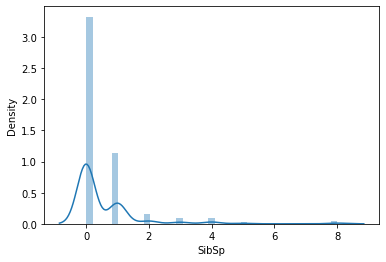

In [104]:
sns.distplot(df['SibSp'])    #binodal right skeness

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

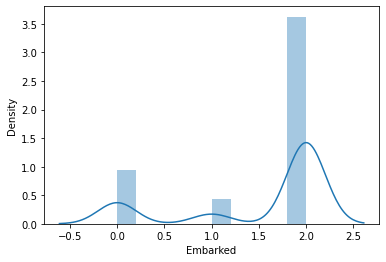

In [105]:
sns.distplot(df['Embarked'])

Checking outliers

<AxesSubplot:xlabel='Fare'>

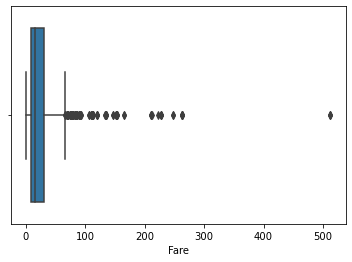

In [106]:
sns.boxplot(df['Fare'])      #outliers present

<AxesSubplot:xlabel='Pclass'>

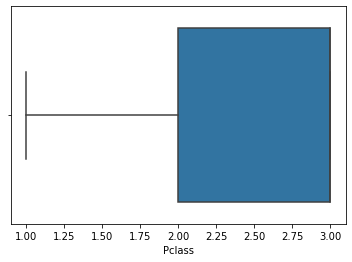

In [107]:
sns.boxplot(df['Pclass'])   #no outliers present


<AxesSubplot:xlabel='Pclass'>

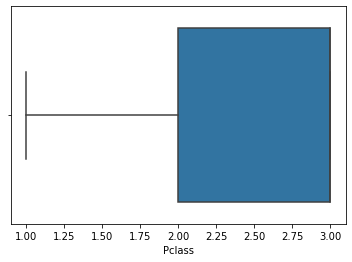

In [108]:
sns.boxplot(df['Pclass'])

<AxesSubplot:xlabel='SibSp'>

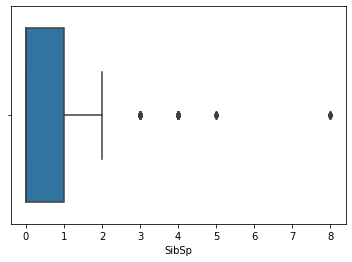

In [109]:
sns.boxplot(df['SibSp'])  #oulier present in this column

<AxesSubplot:xlabel='Parch'>

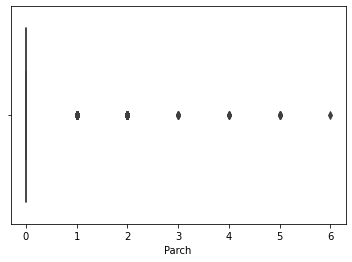

In [110]:
sns.boxplot(df['Parch'])   #outliers present in this column

<AxesSubplot:xlabel='Age'>

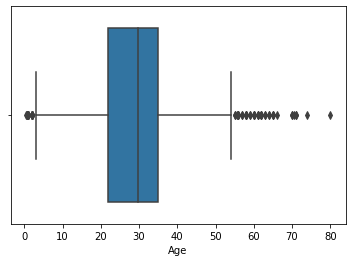

In [111]:
sns.boxplot(df['Age'])

In [112]:
df=df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


Checking MultiColinearity amng the columns

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
X = df[[ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch','Fare','Embarked']]
  
# VIF dataframe                                       # to find multi colinearity
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]                 #we find there's no much mutlicolinearity in the data
print(vif_df)

    feature       VIF
0  Survived  1.953686
1    Pclass  6.125204
2       Sex  3.704164
3       Age  4.890259
4     SibSp  1.581099
5     Parch  1.616113
6      Fare  1.889760
7  Embarked  4.701554


Cehcking outliers

In [115]:
from scipy.stats import zscore

In [117]:
z=np.abs(zscore(df))
z.shape

(891, 8)

In [118]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [119]:
len(np.where(z>3)[0])

72

In [120]:
df_new=df[(z<3).all(axis=1)]
print ('old Dataframe' , df.shape)
print('New DataFrame', df_new.shape)

old Dataframe (891, 8)
New DataFrame (820, 8)


In [122]:
Loss_Percentage=(891-820)/891*100
print(Loss_Percentage,'%')

7.968574635241302 %


In [124]:
x=df_new.drop(['Survived'],axis=1)     #splitting the data to x and y
y=df_new['Survived']

In [125]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [126]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [127]:
from sklearn.preprocessing import power_transform   #to remove the skewness
x=power_transform(x,method='yeo-johnson')

In [129]:
x

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

In [130]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [140]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random_state:',i)
        print('Training accuracy_score',accuracy_score(y_train,pred_train)*100)
        print('testing accuracy_score',accuracy_score(y_test,pred_test)*100,'\n\n')

At random_state: 114
Training accuracy_score 79.26829268292683
testing accuracy_score 79.26829268292683 


At random_state: 119
Training accuracy_score 79.26829268292683
testing accuracy_score 79.26829268292683 


At random_state: 125
Training accuracy_score 79.26829268292683
testing accuracy_score 79.26829268292683 


At random_state: 177
Training accuracy_score 79.8780487804878
testing accuracy_score 79.8780487804878 


At random_state: 301
Training accuracy_score 79.26829268292683
testing accuracy_score 79.26829268292683 


At random_state: 313
Training accuracy_score 79.26829268292683
testing accuracy_score 79.26829268292683 


At random_state: 453
Training accuracy_score 79.26829268292683
testing accuracy_score 79.26829268292683 


At random_state: 543
Training accuracy_score 79.8780487804878
testing accuracy_score 79.8780487804878 


At random_state: 582
Training accuracy_score 79.26829268292683
testing accuracy_score 79.26829268292683 


At random_state: 588
Training accuracy_sc

Since the training and testing accuracy is almost same the model is working fine

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=980,test_size=.20)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))


              precision    recall  f1-score   support

           0       0.70      0.65      0.67       110
           1       0.38      0.44      0.41        54

    accuracy                           0.58       164
   macro avg       0.54      0.54      0.54       164
weighted avg       0.60      0.58      0.59       164

[[71 39]
 [30 24]]


In [141]:
from sklearn.model_selection import cross_val_score
g=accuracy_score(y_test,pred_test)
for j in range(2,10):
    lsscore= cross_val_score(lr,x,y,cv=j)
    lsc= lsscore.mean()
    print('at cv=',j)
    print('cross validation score is',lsc *100)
    print('accuracy_score is',g*100)
    print('\n')

at cv= 2
cross validation score is 78.90243902439025
accuracy_score is 81.09756097560977


at cv= 3
cross validation score is 79.14672513212659
accuracy_score is 81.09756097560977


at cv= 4
cross validation score is 79.14634146341464
accuracy_score is 81.09756097560977


at cv= 5
cross validation score is 79.14634146341463
accuracy_score is 81.09756097560977


at cv= 6
cross validation score is 78.78202375840849
accuracy_score is 81.09756097560977


at cv= 7
cross validation score is 79.2688479129157
accuracy_score is 81.09756097560977


at cv= 8
cross validation score is 79.5128973919665
accuracy_score is 81.09756097560977


at cv= 9
cross validation score is 79.14609545044327
accuracy_score is 81.09756097560977




In [146]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()


model=[lg,gnb,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.7987804878048781
[[94 16]
 [17 37]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.70      0.69      0.69        54

    accuracy                           0.80       164
   macro avg       0.77      0.77      0.77       164
weighted avg       0.80      0.80      0.80       164



accuracy score of GaussianNB() is:
0.7682926829268293
[[88 22]
 [16 38]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       110
           1       0.63      0.70      0.67        54

    accuracy                           0.77       164
   macro avg       0.74      0.75      0.74       164
weighted avg       0.78      0.77      0.77       164



accuracy score of SVC() is:
0.8048780487804879
[[99 11]
 [21 33]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1 

In [150]:
from sklearn.model_selection import GridSearchCV   #Grid Search CV
from sklearn import svm
parameters= {'C':[1,10],'kernel':('linear','rbf')}   #SvC has f1 score of 86% we would do hyper parmeter tuning using Grid search 
svc=svm.SVC()
GCV=GridSearchCV(svcGCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 1, 'kernel': 'rbf'}

In [151]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8048780487804879

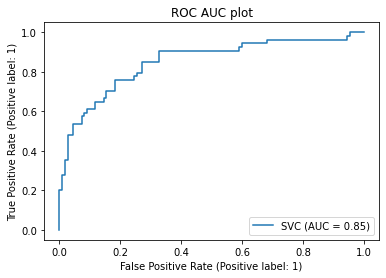

In [152]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [153]:
import joblib
joblib.dump(GCV.best_estimator_,'titanic.pkl')

['titanic.pkl']